![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Data Driven Business - Final Project - Modeling

#### Import Libraries

In [53]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Import Data

In [54]:
# Read in the selected_features.csv file
raw = pd.read_csv('selected_features.csv')
df = raw.copy()


In [55]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,224.0,2017.0,10.0,2.0,0.0,0.0,0.0,0.0,65.00,0.0,0.0
1,2.0,0.0,2.0,3.0,0.0,0.0,1.0,5.0,2018.0,11.0,6.0,1.0,0.0,0.0,0.0,106.68,1.0,0.0
2,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2018.0,2.0,28.0,1.0,0.0,0.0,0.0,60.00,0.0,1.0
3,2.0,0.0,0.0,2.0,1.0,0.0,1.0,211.0,2018.0,5.0,20.0,1.0,0.0,0.0,0.0,100.00,0.0,1.0
4,2.0,0.0,1.0,1.0,0.0,0.0,1.0,48.0,2018.0,4.0,11.0,1.0,0.0,0.0,0.0,94.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35725,3.0,0.0,2.0,6.0,1.0,0.0,4.0,85.0,2018.0,8.0,3.0,1.0,0.0,0.0,0.0,167.80,1.0,0.0
35726,2.0,0.0,1.0,3.0,1.0,0.0,1.0,228.0,2018.0,10.0,17.0,1.0,0.0,0.0,0.0,90.95,2.0,1.0
35727,2.0,0.0,2.0,6.0,1.0,0.0,1.0,148.0,2018.0,7.0,1.0,1.0,0.0,0.0,0.0,98.39,2.0,0.0
35728,2.0,0.0,0.0,3.0,0.0,0.0,1.0,63.0,2018.0,4.0,21.0,1.0,0.0,0.0,0.0,94.50,0.0,1.0


#### Train different models

/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielrenno/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

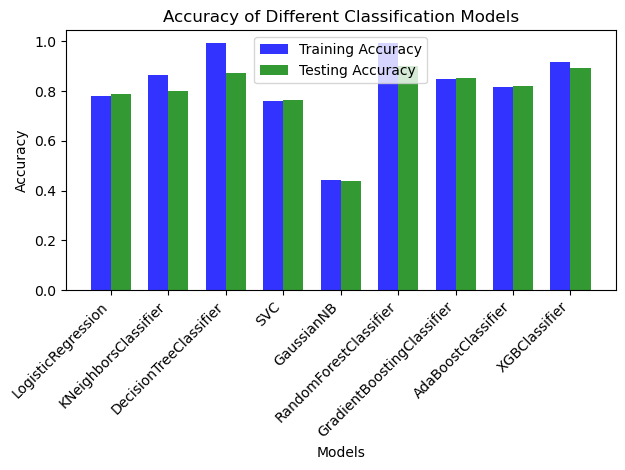

In [56]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# load dataset
data = df

# separate the features and target variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a list of 10 different classification models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    
]

# create empty lists to store the accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []
model_names = []

# loop through each model and train it on the training data
for model in models:
    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the target variable on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate the accuracy score on the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # append the accuracy score and model name to the lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    model_names.append(type(model).__name__)

# create a bar chart of the accuracy scores
fig, ax = plt.subplots()
x_pos = np.arange(len(model_names))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x_pos, train_accuracy_scores, bar_width,
                alpha=opacity, color='b',
                label='Training Accuracy')

rects2 = ax.bar(x_pos + bar_width, test_accuracy_scores, bar_width,
                alpha=opacity, color='g',
                label='Testing Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Classification Models')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()



#### Model Selection

In [57]:
# Create a dataframe of the accuracy scores
accuracy_df = pd.DataFrame({'Model': model_names, 'Training Accuracy': train_accuracy_scores, 'Testing Accuracy': test_accuracy_scores})
accuracy_df

,Model,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.781136,0.787200
1,KNeighborsClassifier,0.863340,0.800075
2,DecisionTreeClassifier,0.994362,0.872190
3,SVC,0.759786,0.763038
4,GaussianNB,0.441086,0.439220
5,RandomForestClassifier,0.994362,0.899711
6,GradientBoostingClassifier,0.850306,0.852785
7,AdaBoostClassifier,0.815241,0.818920
8,XGBClassifier,0.918276,0.890941


In [58]:
# Create a column with the difference between the training and testing accuracy
accuracy_df['Difference'] = accuracy_df['Training Accuracy'] - accuracy_df['Testing Accuracy']
# Sort the dataframe by the difference between the training and testing accuracy
accuracy_df.sort_values(by='Difference', ascending=False)

,Model,Training Accuracy,Testing Accuracy,Difference
2,DecisionTreeClassifier,0.994362,0.872190,0.122173
5,RandomForestClassifier,0.994362,0.899711,0.094652
1,KNeighborsClassifier,0.863340,0.800075,0.063265
8,XGBClassifier,0.918276,0.890941,0.027335
4,GaussianNB,0.441086,0.439220,0.001866
6,GradientBoostingClassifier,0.850306,0.852785,-0.002479
3,SVC,0.759786,0.763038,-0.003252
7,AdaBoostClassifier,0.815241,0.818920,-0.003678
0,LogisticRegression,0.781136,0.787200,-0.006064


#### Train a voting ensemble model with the models with low overfitting e good accuracy

Voting Ensemble training accuracy: 0.8974951021550518
Voting Ensemble testing accuracy: 0.8879093198992444
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      4786
         1.0       0.87      0.78      0.82      2360

    accuracy                           0.89      7146
   macro avg       0.88      0.86      0.87      7146
weighted avg       0.89      0.89      0.89      7146



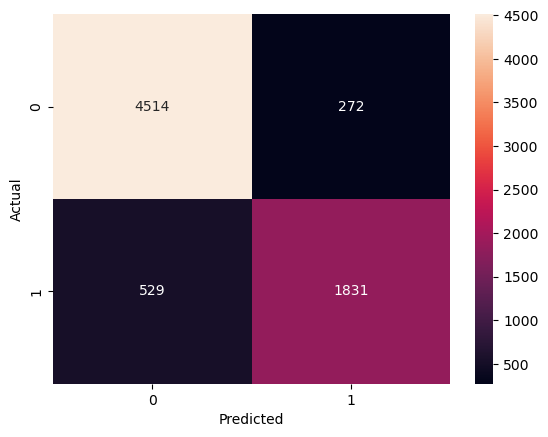

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the models
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Add XGBClassifier() to the list of models

models = [GradientBoostingClassifier(), 
          AdaBoostClassifier(), 
          XGBClassifier()
          #GaussianNB(), 
          #SVC(probability=True), 
          #LogisticRegression()
          ]




# load dataset
data = df

# separate the features and target variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the voting classifier with the models and soft voting
voting_clf = VotingClassifier(estimators=[('gb', models[0]), 
                                          ('ada', models[1]),
                                          ('xgb', models[2])] 
                                          #('gnb', models[2]), 
                                          #('svc', models[2]), 
                                          #('lr', models[3])], 

                              ,voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on training set 
y_pred_train = voting_clf.predict(X_train)
# Predict on the testing data
y_pred_test = voting_clf.predict(X_test)

# Evaluate the accuracy of the voting classifier on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Voting Ensemble training accuracy: {accuracy_train}")
# Evaluate the accuracy of the voting classifier on testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Voting Ensemble testing accuracy: {accuracy_test}")

# Output classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

# Plot the confusion matrix with the labels names
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()










In [65]:
# Append the probability of the target variable to the dataframe
df['probability'] = voting_clf.predict_proba(X)[:, 1]
# Appennd the y to the dataframe
df["booking_status"] = data["booking_status"]
# Sort by probability
df.sort_values(by='probability', ascending=False, inplace=True)


In [62]:
df.shape

(35730, 19)

In [63]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,probability
12557,3.0,0.0,5.0,12.0,1.0,0.0,4.0,208.0,2018.0,9.0,12.0,1.0,0.0,0.0,0.0,150.45,0.0,1.0,0.842623
720,2.0,2.0,4.0,10.0,1.0,0.0,6.0,222.0,2018.0,8.0,14.0,1.0,0.0,0.0,0.0,158.95,0.0,1.0,0.842620
34810,2.0,0.0,4.0,10.0,1.0,0.0,1.0,167.0,2018.0,9.0,3.0,1.0,0.0,0.0,0.0,119.85,0.0,1.0,0.842615
8814,1.0,0.0,4.0,11.0,1.0,0.0,1.0,155.0,2018.0,8.0,30.0,1.0,0.0,0.0,0.0,117.42,0.0,1.0,0.842209
2709,2.0,2.0,0.0,1.0,2.0,0.0,6.0,222.0,2018.0,10.0,29.0,1.0,0.0,0.0,0.0,219.60,0.0,1.0,0.840589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,2.0,1.0,2.0,5.0,1.0,0.0,4.0,31.0,2018.0,1.0,30.0,0.0,0.0,0.0,0.0,84.03,3.0,0.0,0.099770
11487,1.0,0.0,0.0,2.0,1.0,0.0,1.0,4.0,2018.0,11.0,2.0,2.0,1.0,0.0,4.0,88.00,3.0,0.0,0.099467
5558,2.0,1.0,2.0,0.0,1.0,0.0,1.0,13.0,2017.0,12.0,6.0,0.0,0.0,0.0,0.0,76.50,3.0,0.0,0.098518
22841,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2018.0,12.0,15.0,1.0,0.0,0.0,0.0,97.00,3.0,0.0,0.098357


#### Saving the model and building a function

In [67]:
# Create a new df with all the columns except the last 
df_new = df.iloc[:, :-2]
# Delete all the rows
df_new.drop(df_new.index, inplace=True)
# Add a new row using a list comprehension
df_new.loc[0] = [i for i in range(len(df.columns)-2)]
# Calculate the probability using the voting classifier
df_new['probability'] = voting_clf.predict_proba(df_new)[:, 1]
df_new

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,probability
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0.094355


In [80]:
# Build a function for future predictions
def predict_booking_status(data):
    # Import pickle and pandas and predict_proba
    
    import pandas as pd
    import pickle
    # Read the data
    data = pd.read_csv(data)
    # Import model.pkl
    model = pickle.load(open('model.pkl', 'rb'))
    # Append the probability of the target variable to the dataframe
    data['probability'] = model.predict_proba(data)[:, 1]
    # Probability in percentage
    data['probability'] = data['probability'].apply(lambda x: x*100)
    # Sort by probability
    data.sort_values(by='probability', ascending=False, inplace=True)
    print("model accuracy is: 88%")
    # Return the dataframe
    return data

model accuracy is: 88%


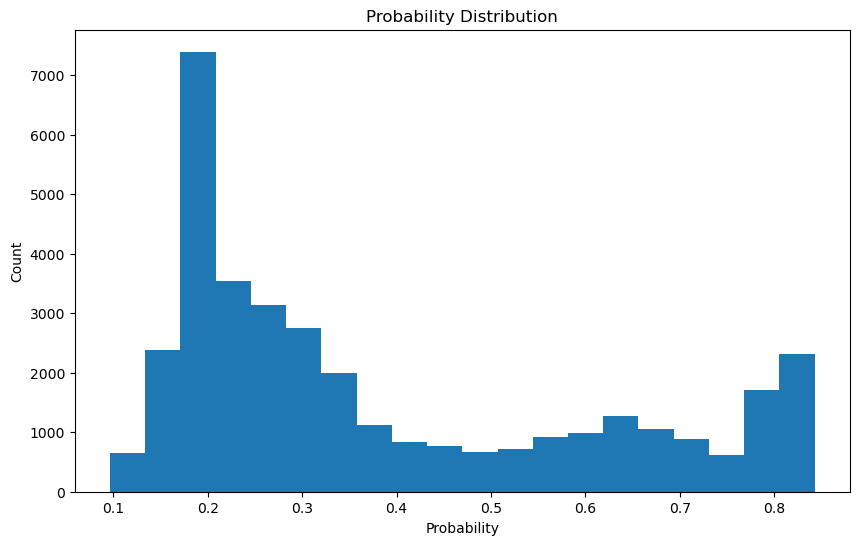

In [79]:
# Test the function

# Import the dataset
data = pd.read_csv("selected_features.csv")
# Drop the target variable
data.drop("booking_status", axis=1, inplace=True)
# Predict the booking status
predict_booking_status( data)

# Plot probability
plt.figure(figsize=(10, 6))
plt.hist(df['probability'], bins=20)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Probability Distribution')
plt.show()


In [73]:
# Save model
import pickle
pickle.dump(voting_clf, open('model.pkl','wb'))